This notebook is by Anastasia Ruzmaikina.

In this notebook, we are going to predict the quality of wine using Linear Classification. The data set we are using contains around 6500 wines, where each wine has several attributes: PH, alchohol, fixed acidity, residual sugar, density, etc. We use these variables to predict if the wine is high quality. We use the same variables to predict if the wine is red or white.

In [119]:
#Import Libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

Load the data set.

In [120]:
wine = pd.read_csv('wine.csv')

Understand the data.

In [121]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  color                 6497 non-null   object 
 13  high_quality          6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


There is only one non-numerical column, called 'color'. We can do one hot encoding for this column.

In [122]:
# Let's do one hot encoding for the column `color' as Logistic Regression model would be expecting numeric features
color_dummies = pd.get_dummies(data=wine,columns=['color'])

In [123]:
wine = color_dummies

Now the wine dataframe dropped the column 'color' and added two columns 'color_red' and 'color_white' with 0s and 1s.

In [124]:
wine

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,high_quality,color_red,color_white
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,1,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,1,0
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,0,1
6493,6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0,1
6494,6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,0,1
6495,6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,0,1


We drop the "Unnamed: 0" column because it does not contribute any information.

In [125]:
wine.drop(['Unnamed: 0'], axis=1, inplace=True)

In [126]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,high_quality,color_red,color_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.633061,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.482007,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000,1.000000


In [127]:
num_col = wine.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = wine.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'high_quality', 'color_red',
       'color_white'],
      dtype='object')
Categorical columns: 
 Index([], dtype='object')


Now all the columns are numerical and can be used in Logistic Regression.



Exploratory Data Analysis:

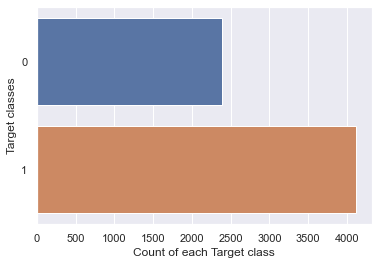

In [128]:
# Check the distribution of y variable to see if it's a case of unbalanced class

sns.countplot(y=wine.high_quality ,data=wine)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

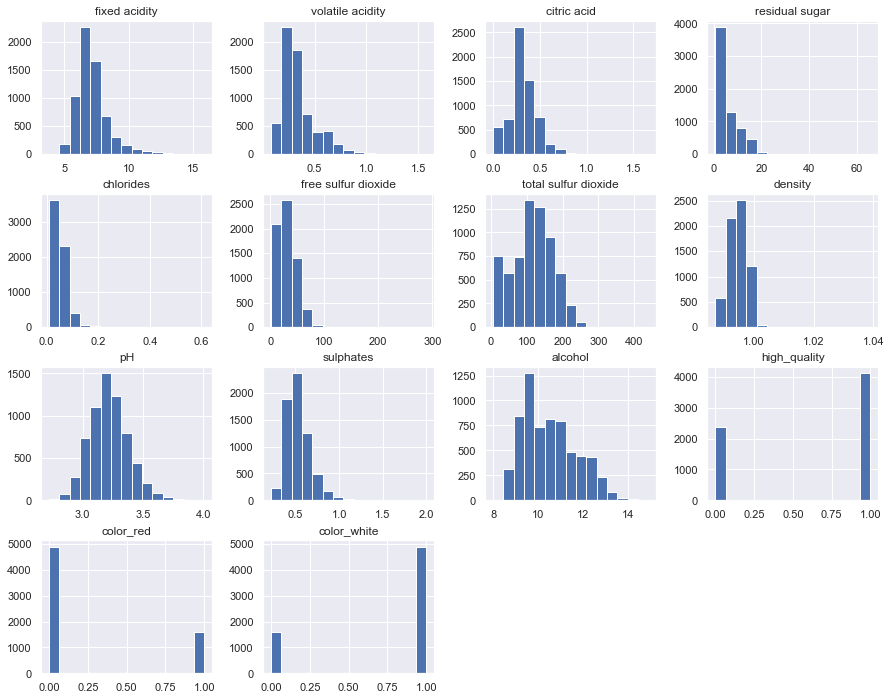

In [129]:
# Check the distribution of all the features

wine.hist(figsize=(15,12),bins = 15)
plt.show()

Now we create boxplots for the features of the wine, separately for high quality and not high quality wines.

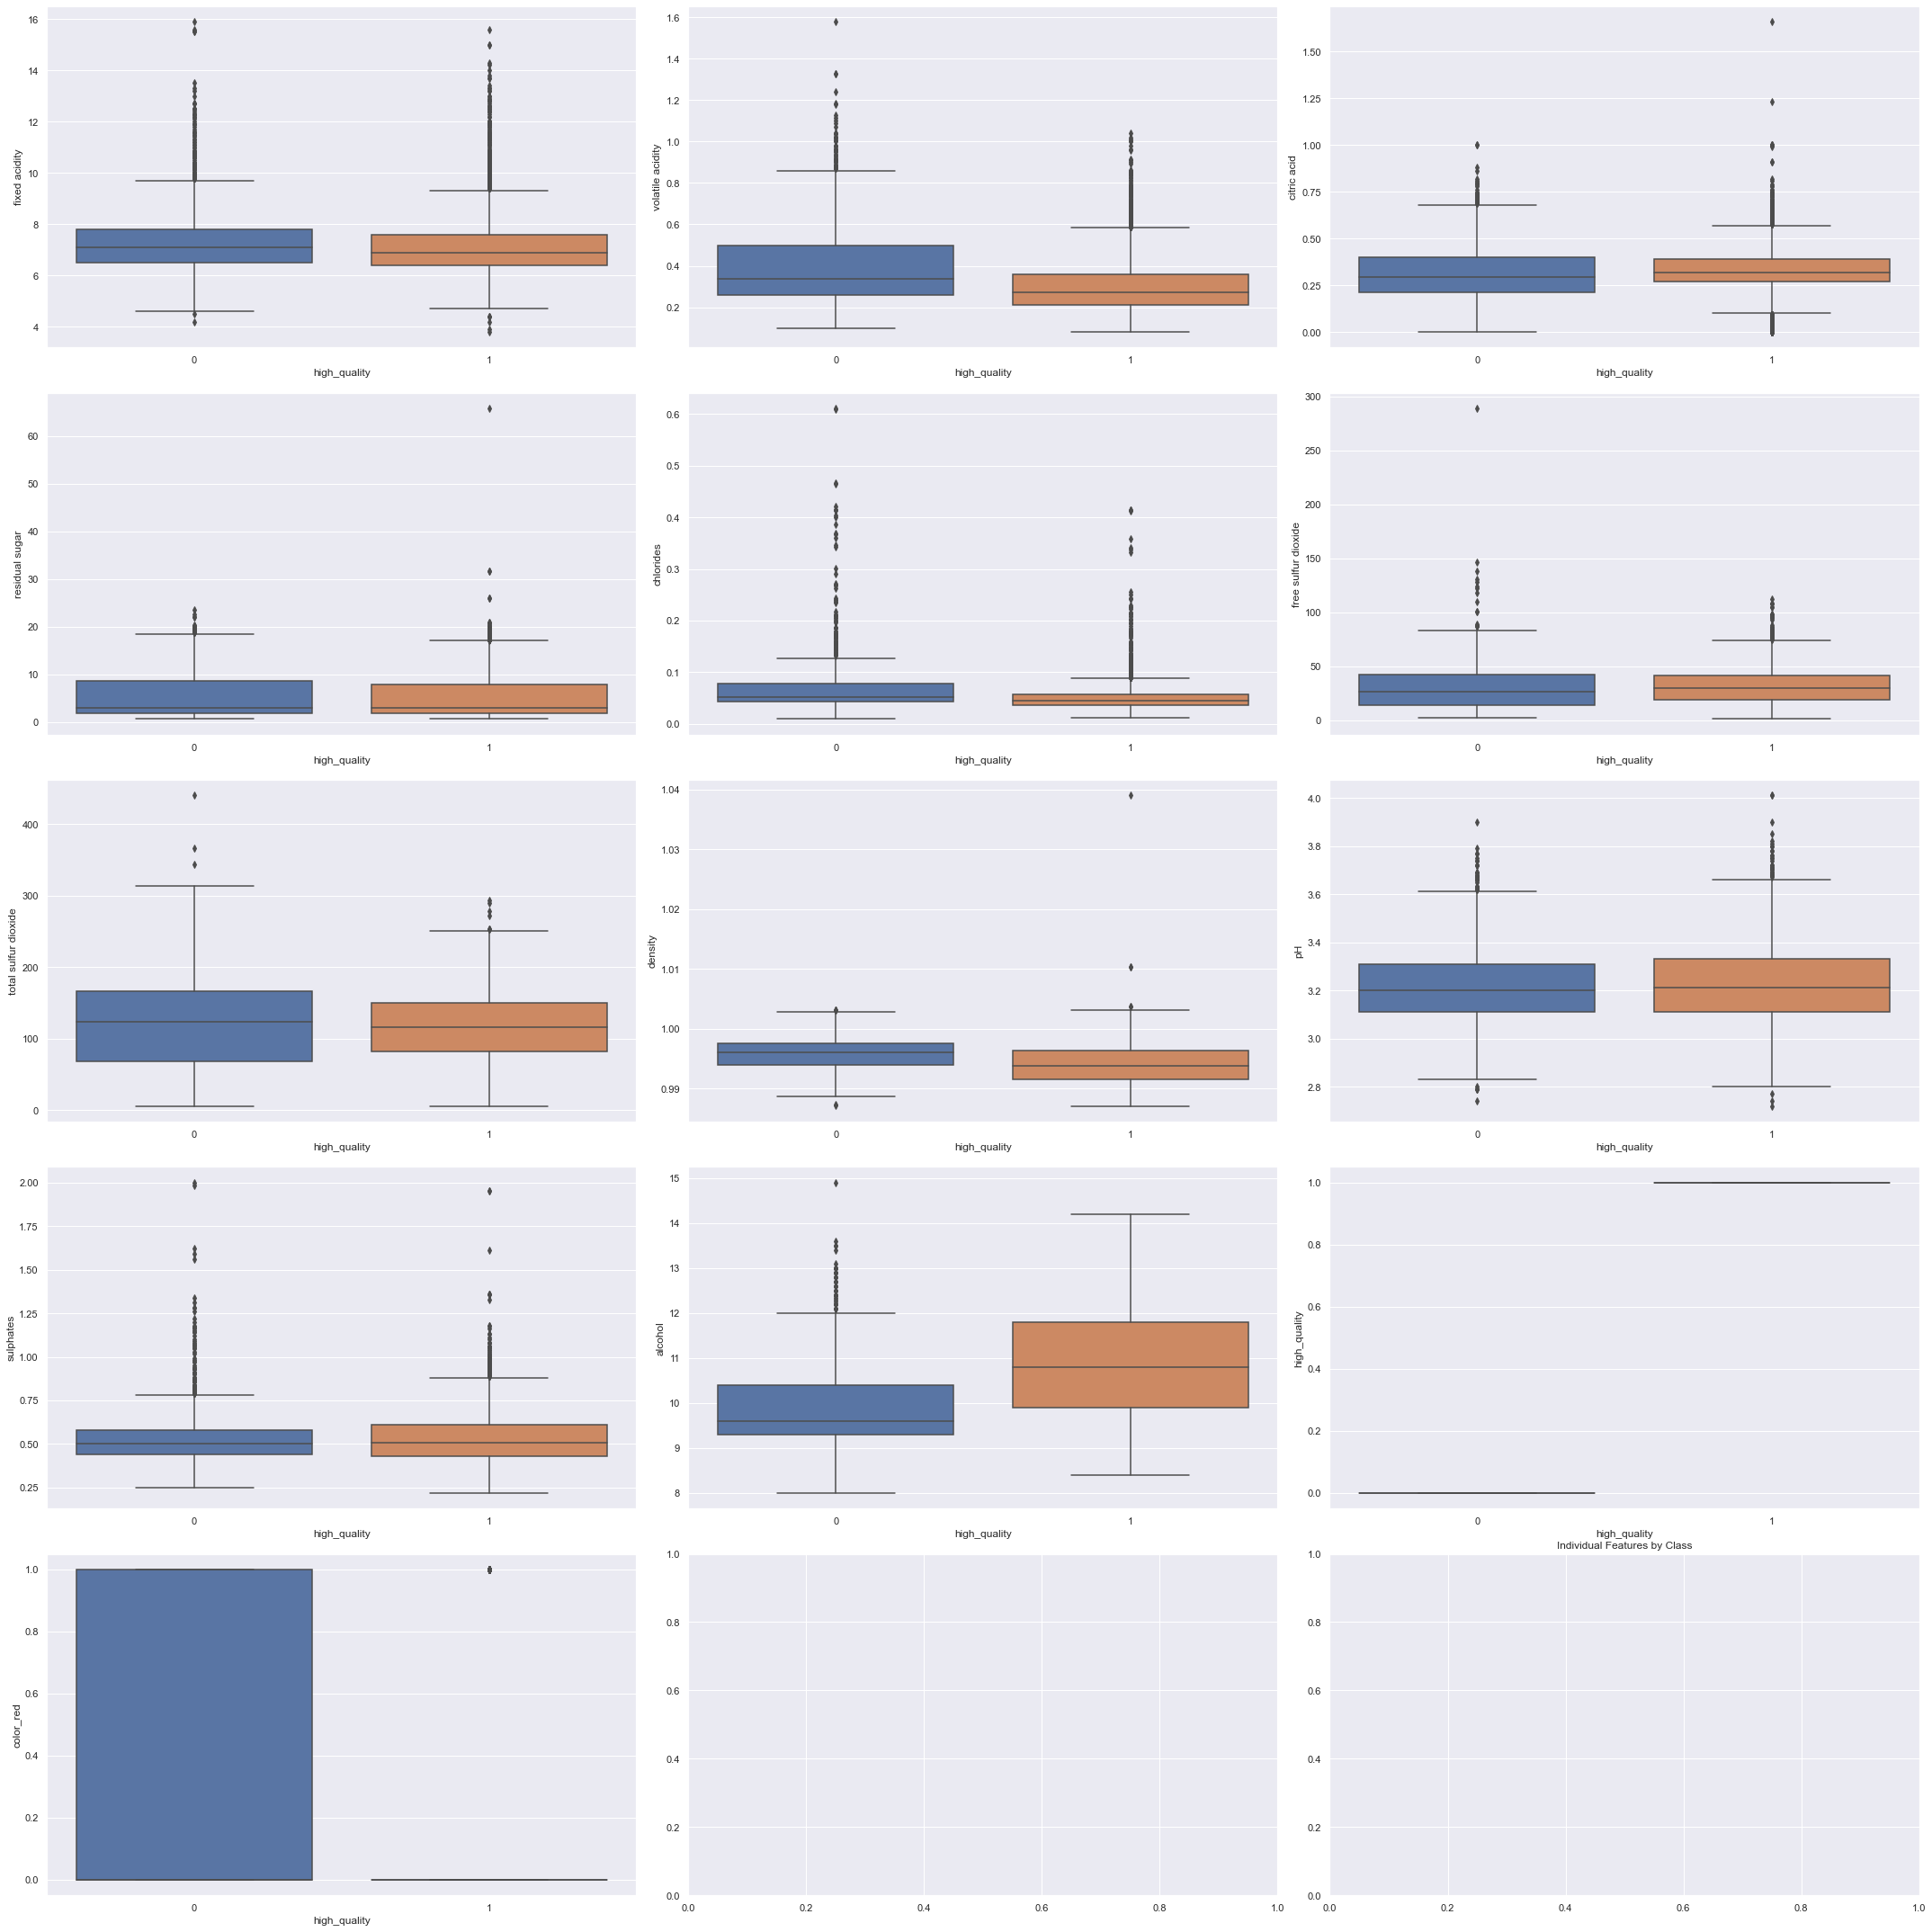

In [199]:
# Let's check the distribution of y variable corresponding to every feature/x variable 

fig,ax = plt.subplots(nrows = 5, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(wine.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = wine['high_quality'], y = wine[wine.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.savefig('plots')
plt.title("Individual Features by Class")
plt.show()


We see that the boxplots for the features: 'fixed acidity','volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'PH', 'sulfates', 'alcohol', 'color' show the difference between high quality and not high quality wines.

Now we can calculate the correlations between different columns.

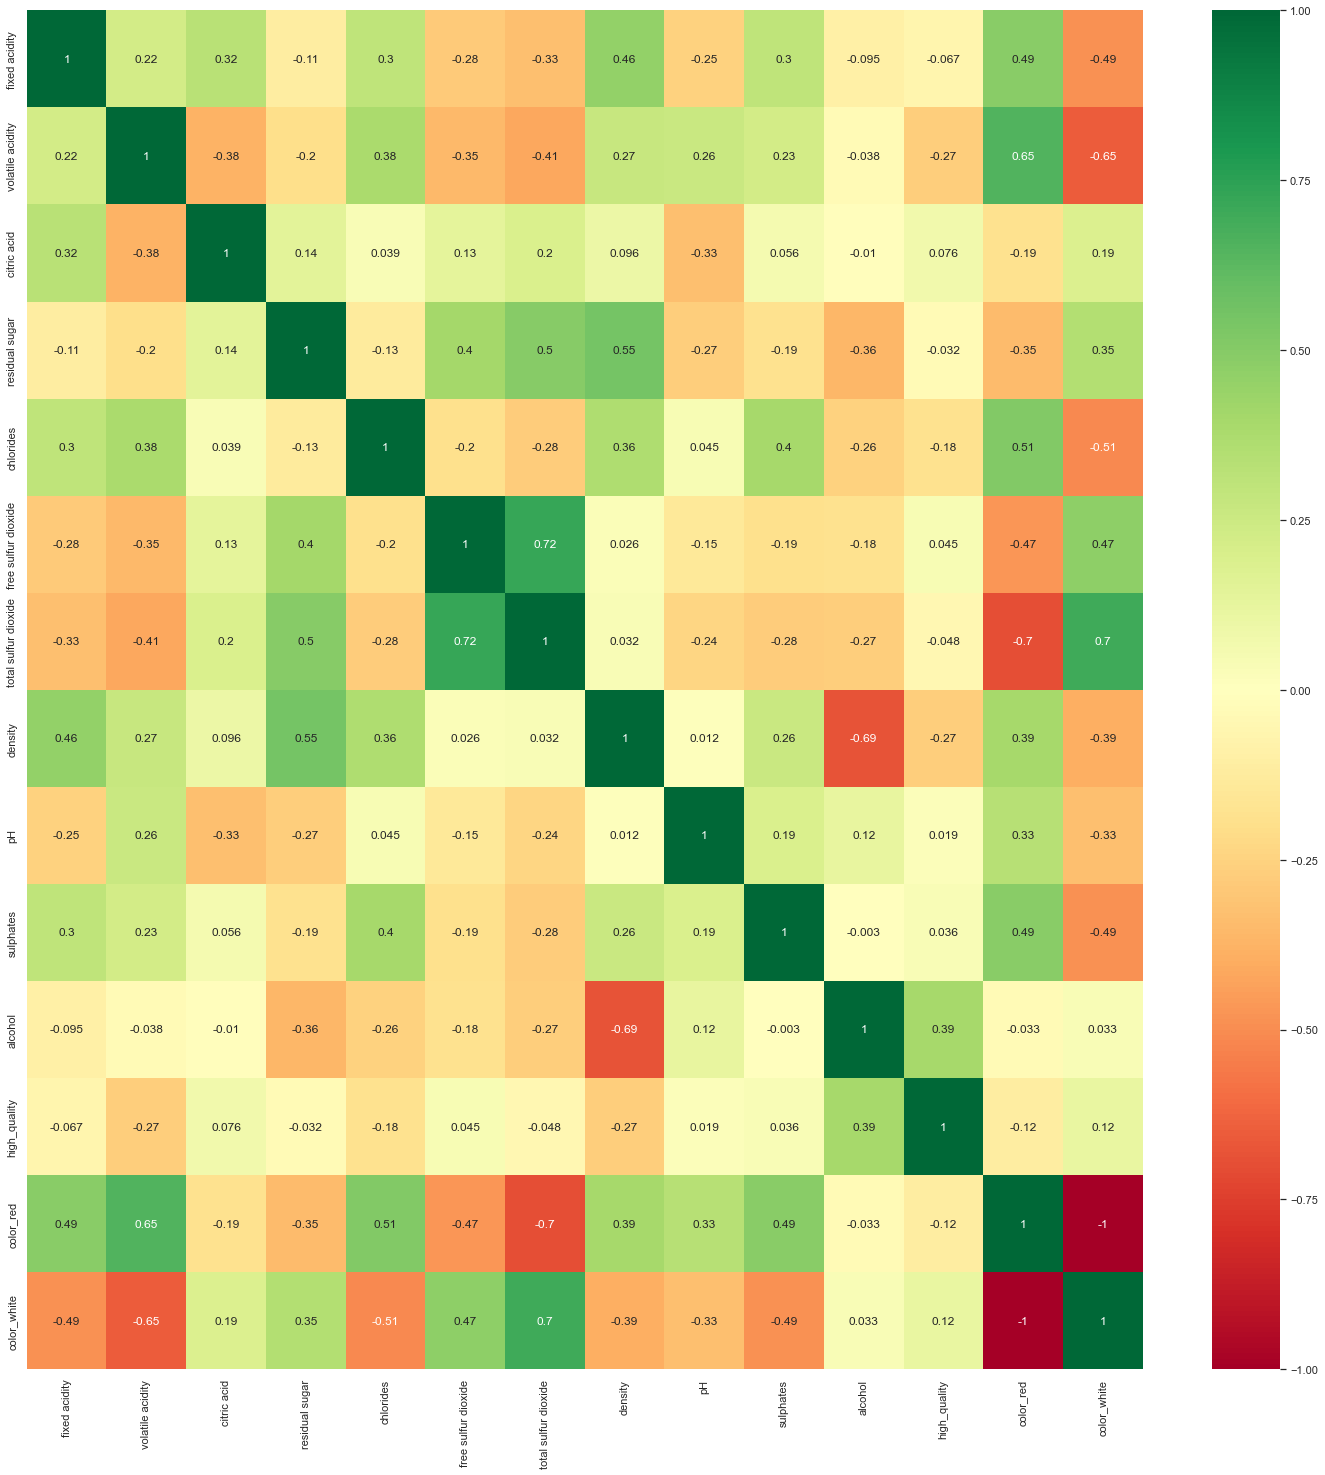

In [131]:
# Check the multicollinearity of features using the correlation matric
plt.figure(figsize=(25,25))
p = sns.heatmap(wine.corr(), annot=True,cmap='RdYlGn',center=0) 

Here are ten columns with the highest correlations to the 'high_quality' column.

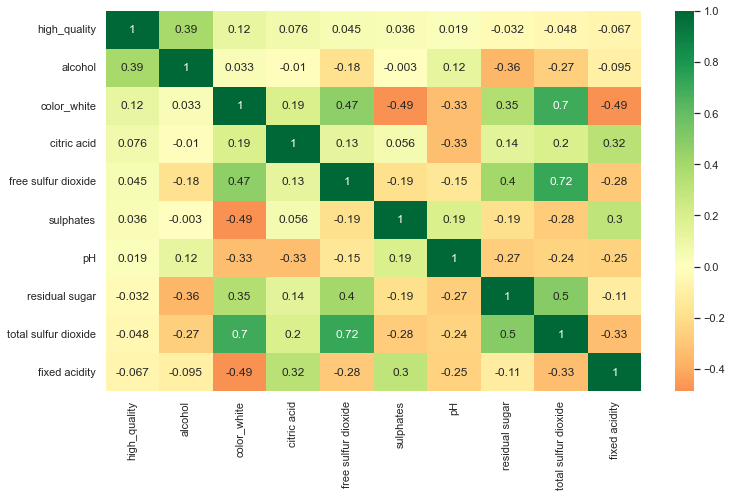

In [132]:
k = 10 #number of variables for heatmap
cols = wine.corr().nlargest(k, 'high_quality')['high_quality'].index
plt.figure(figsize=(12,7))
p = sns.heatmap(wine[cols].corr(), annot=True,cmap='RdYlGn',center=0) 

Model Building:

We take X data to be all the columns except the column we are predicting and y data to be 'high_quality' column we are trying to predict.

We do a train test split, where 33% of the data goes into the test set.

We rescale all the X data columns so that one of the columns does not dominate all the other columns.

In [180]:
# Split the y variable series and x variables dataset

X = wine.drop(['high_quality'],axis=1)
y = wine.high_quality

In [181]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [182]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression Classification:

In [183]:
# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(X_train, y_train)


LogisticRegression()

Prediction and Performance Metric:

In [187]:
# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(X_test)

lr_probs = lr.predict_proba(X_test)

print('predicted values', y_pred0)
print('number of predicted ones', y_pred0.sum())
print('probability of high quality', lr_probs[:,1])

predicted values [0 1 1 ... 1 1 1]
number of predicted ones 1505
probability of high quality [0.47354889 0.91257269 0.61963087 ... 0.77768659 0.81842609 0.56555479]


Accuracy:

In [185]:
# Checking the performance of logistic regression model

score_lr = lr.score(X_test, y_test)
print(score_lr)
accuracy = accuracy_score(y_test, y_pred0)
print(accuracy)

0.73006993006993
0.73006993006993


Confusion Matrix:

In [186]:
# Python script for confusion matrix creation. 

actual = y_test
predicted = y_pred0 
results = confusion_matrix(actual, predicted) 


print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[ 427  366]
 [ 213 1139]]


The columns in the confusion matrix are the count of predicted 0’s and 1’s (from y_pred0), while, the rows are the actuals (from y_test).

We have 427 out of 793 zero instances predicted as zero 

and 1139 out of 1352 one instances predicted as one. 

This is a good true positive rate, but not a very good true negative rate.

Secondly, we have 366 in top-right of the table. This means the model predicted 366 instance as 1 which were actually 0.

Also, the model predicted 213 instances as 0 when the real value is 1.



Accuracy, Precision, Recall, F1 Score:

In [140]:
print (classification_report(actual, predicted) )

              precision    recall  f1-score   support

           0       0.67      0.54      0.60       793
           1       0.76      0.84      0.80      1352

    accuracy                           0.73      2145
   macro avg       0.71      0.69      0.70      2145
weighted avg       0.72      0.73      0.72      2145



Often, choosing the best model is sort of a balance between predicting the one's accurately or the zeroes accurately. In other words sensitivity and specificity.

But it would be great to have something that captures both these aspects in one single metric.

This is nicely captured by the 'Receiver Operating Characteristics' curve, also called as the ROC curve. In fact, the area under the ROC curve can be used as an evaluation metric to compare the efficacy of the models.

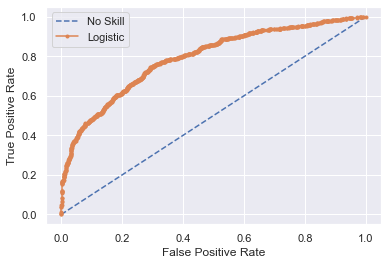

In [141]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_probs = lr.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [142]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.792


Now we construct a new Logistic Regression model to predict the color of the wine (red or white) using other attributes of the wine.

Our X data are all the columns except 'color_red' and 'color_white' columns. Our y data is the 'color_white' column.

We do a train test split, where 50% of the data goes into the test set.

We rescale our X columns so that one column does not overpower other columns.

In [188]:
# Split the y variable series and x variables dataset

X = wine.drop(['color_white', 'color_red'],axis=1)
y = wine.color_white

In [189]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [190]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [191]:
# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(X_train, y_train)


LogisticRegression()

In [192]:
# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(X_test)

lr_probs = lr.predict_proba(X_test)

print('predicted values', y_pred0)
print('number of predicted white', y_pred0.sum())
print('probability of white wine\n', lr_probs[:,1])

predicted values [1 1 1 ... 1 1 1]
number of predicted white 2442
probability of white wine
 [0.99900018 0.98634583 0.99730579 ... 0.96020534 0.99216948 0.99918252]


In [193]:
# Checking the performance of logistic regression model

score_lr = lr.score(X_test, y_test)
print(score_lr)

0.9950754078177901


In [194]:
# Python script for confusion matrix creation. 

actual = y_test
predicted = y_pred0 
results = confusion_matrix(actual, predicted) 


print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[ 800    9]
 [   7 2433]]


We see that the true negative and true positive rates are very high:

out of 809 zeros,  800 zeros were predicted correctly, 

out of 2440 ones, 2433 ones were predicted correctly.

In [195]:
print (classification_report(actual, predicted) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       809
           1       1.00      1.00      1.00      2440

    accuracy                           1.00      3249
   macro avg       0.99      0.99      0.99      3249
weighted avg       1.00      1.00      1.00      3249



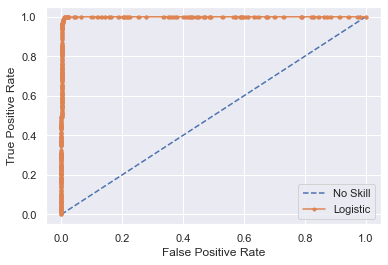

In [196]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_probs = lr.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [197]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.998


In conclusion, we can predict if the wine is high quality with accuracy score 73% and can predict the color of the wine with accuracy score 99.5%.

The reason we can predict the color more accurately than the quality is that there are a lot of wines at the 'high_quality' cutoff, which could potentially be callsified as high quality wines. However the distinction between red and white wines is much more clear.